# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch

![image.png](attachment:image.png)

# Data Pre Processing

In [1]:
# %pip install opencv-python
# %pip cache purge
# %pip install --upgrade tensorflow-macos tensorflow-metal

In [2]:
# # %pip install tensorflow-macos==2.10 tensorflow-metal==0.6
# !conda install -c apple tensorflow-deps==2.9.0
# !python -m pip install tensorflow-macos==2.9.0
# !python -m pip install tensorflow-metal==0.5.0
# %pip install tensorflow
# %pip install tf-keras
# %pip install ml_dtypes==0.2.0
# %pip install numpy

In [3]:
# %pip install tensorflow-macos

In [4]:
# %pip install numpy==1.23.5
# %pip install --upgrade accelerate

In [5]:
#%pip uninstall numpy
# %pip show numpy

In [6]:
# %pip install numpy --upgrade --ignore-installed

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


dataset_path = os.listdir('/content/drive/MyDrive/PublicFolder/DataSet/train/')

print (dataset_path)  #what kinds of classes are in this dataset
dataset_path = [ 'Malignant', 'Benign']
print("Types of classes labels found: ", len(dataset_path))

['Benign', 'Malignant']
Types of classes labels found:  2


In [9]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('/content/drive/MyDrive/PublicFolder/DataSet/train' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [10]:
len(class_labels)

3816

In [11]:

# Build a dataframe
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

      Labels                                     image
0  Malignant  dataset_path/Malignant/24065289 (40).png
1  Malignant   dataset_path/Malignant/22427751 (7).png
2  Malignant   dataset_path/Malignant/22614266 (4).png
3  Malignant   dataset_path/Malignant/22614522 (6).png
4  Malignant  dataset_path/Malignant/53582683 (67).png
      Labels                                  image
3811  Benign  dataset_path/Benign/22580680 (60).png
3812  Benign  dataset_path/Benign/22670620 (10).png
3813  Benign  dataset_path/Benign/22580680 (48).png
3814  Benign       dataset_path/Benign/53586869.png
3815  Benign   dataset_path/Benign/22580732 (2).png


In [12]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  3816
Labels
Malignant    2556
Benign       1260
Name: count, dtype: int64


In [13]:
import cv2
path = '/content/drive/MyDrive/PublicFolder/DataSet/train/'
#dataset_path = os.listdir(path)

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [14]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255].

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(3816, 224, 224, 3)

In [15]:
df.shape

(3816, 2)

In [16]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform (y)
print (y)

['Malignant' 'Malignant' 'Malignant' ... 'Benign' 'Benign' 'Benign']
[1 1 1 ... 0 0 0]


In [17]:
len(y)

3816

In [18]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [19]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


# images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(3625, 224, 224, 3)
(3625, 2)
(191, 224, 224, 3)
(191, 2)



# EfficientNet Implementation :



In [20]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers.legacy import Adam
NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [21]:
model = tf.keras.Model(inputs, outputs)
# model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
#from tf.keras.optimizers.legacy import Adam
#from tensorflow.keras.optimizers.legacy import Adam
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 2)                   │       4,052,133 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,052,133 (15.46 MB)

 Trainable params: 4,010,110 (15.30 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/30
114/114 - 154s - 1s/step - accuracy: 0.5997 - loss: 1.4576
Epoch 2/30
114/114 - 39s - 339ms/step - accuracy: 0.6339 - loss: 0.8476
Epoch 3/30
114/114 - 20s - 179ms/step - accuracy: 0.6623 - loss: 0.7777
Epoch 4/30
114/114 - 20s - 179ms/step - accuracy: 0.6646 - loss: 0.7371
Epoch 5/30
114/114 - 20s - 179ms/step - accuracy: 0.6651 - loss: 0.7209
Epoch 6/30
114/114 - 20s - 180ms/step - accuracy: 0.6640 - loss: 0.7001
Epoch 7/30
114/114 - 21s - 182ms/step - accuracy: 0.6657 - loss: 0.6626
Epoch 8/30
114/114 - 20s - 177ms/step - accuracy: 0.7286 - loss: 0.5951
Epoch 9/30
114/114 - 21s - 181ms/step - accuracy: 0.7324 - loss: 0.5858
Epoch 10/30
114/114 - 20s - 179ms/step - accuracy: 0.8047 - loss: 0.4755
Epoch 11/30
114/114 - 20s - 180ms/step - accuracy: 0.8257 - loss: 0.4177
Epoch 12/30
114/114 - 20s - 179ms/step - accuracy: 0.8839 - loss: 0.3058
Epoch 13/30
114/114 - 20s - 180ms/step - accuracy: 0.9079 - loss: 0.2354
Epoch 14/30
114/114 - 20s - 179ms/step - accuracy: 0.9183 - lo

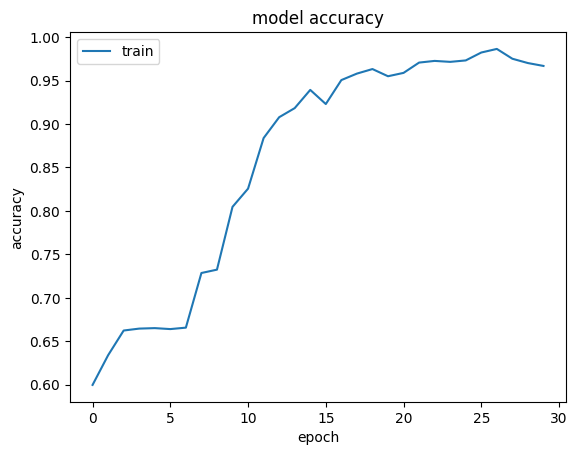

In [22]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [23]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8786 - loss: 0.6486
Loss = 0.8557190299034119
Test Accuracy = 0.8429319262504578
